<a href="https://colab.research.google.com/github/CJGS4L/stat2/blob/main/3_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-32-e47d05161a69>:24: UserWarning: p-value capped: true value larger than 0.25
  pv_ksamp = np.sort(np.array([ss.anderson_ksamp([data[i][j] for j in range(k)]).pvalue for i in range(m)]))


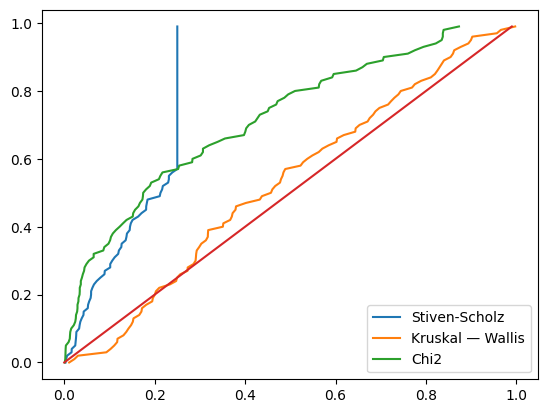

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.optimize as so
import statistics as st
import pandas as pd
import scipy.stats as sts

def chi_chi(data, K, n, m):
  k = int(np.log(K * n) / np.log(2))
  c = int(n * K / k) #кол элементов в промежутке
  data = np.array([[np.sort(data[i][j]) for j in range(K)] for i in range(m)])
  D = np.sort(data.reshape(data.shape[0], -1))
  t = k - (n*K - k*c)
  bins = np.array([[float((D[j][c*i - 1]) * int(i <= t) + ( D[j][t*c - 1 + (i - t)*(c + 1)]) * int(i > t)) for i in range(1, k)] for j in range(m)])
  bins = np.insert(bins, 0, -math.inf, axis = 1)
  bins = np.insert(bins, k, math.inf, axis = 1)
  h = np.array([[pd.cut(data[i][j], bins = bins[i]).value_counts().tolist() for j in range(K)]for i in range(m)])
  return h

def task (data, k, n, m):
  pv_ksamp = np.sort(np.array([ss.anderson_ksamp([data[i][j] for j in range(k)]).pvalue for i in range(m)]))
  pv_kruskal = np.sort(np.array([ss.kruskal(data[i][0],data[i][1],data[i][2],data[i][3]).pvalue for i in range(m)]))
  pv_chi = np.sort(np.array([ss.chi2_contingency(chi_chi(data, k, n, m)[i]).pvalue for i in range(m)]))
  R = np.arange(0, 1, 1/len(pv_chi))
  plt.plot(pv_ksamp, R, label = 'Stiven-Scholz' )
  plt.plot(pv_kruskal, R, label = 'Kruskal — Wallis')
  plt.plot(pv_chi, R, label = 'Chi2')
  plt.plot(R, R)
  plt.legend()

n, k, m = 40, 4, 100
data = np.zeros((m, k, n))
for j in range(m):
  for i in range(k):
    data[j][i] = ss.norm.rvs(loc = 0, scale = (2 + i) ** 0.5, size = n)
task(data, k, n, m)


<ipython-input-32-e47d05161a69>:24: UserWarning: p-value capped: true value larger than 0.25
  pv_ksamp = np.sort(np.array([ss.anderson_ksamp([data[i][j] for j in range(k)]).pvalue for i in range(m)]))
<ipython-input-32-e47d05161a69>:24: UserWarning: p-value floored: true value smaller than 0.001
  pv_ksamp = np.sort(np.array([ss.anderson_ksamp([data[i][j] for j in range(k)]).pvalue for i in range(m)]))


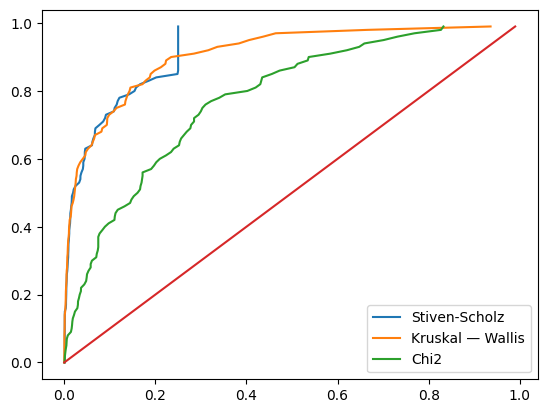

In [ ]:
n, k, m = 25, 4, 100
data = np.zeros( (m, k, n))
for j in range(m):
  for i in range(k):
    data[j][i] = ss.norm.rvs(loc = i/4, scale = 1, size = n)
task(data, k, n, m)

<ipython-input-32-e47d05161a69>:24: UserWarning: p-value capped: true value larger than 0.25
  pv_ksamp = np.sort(np.array([ss.anderson_ksamp([data[i][j] for j in range(k)]).pvalue for i in range(m)]))
<ipython-input-32-e47d05161a69>:24: UserWarning: p-value floored: true value smaller than 0.001
  pv_ksamp = np.sort(np.array([ss.anderson_ksamp([data[i][j] for j in range(k)]).pvalue for i in range(m)]))


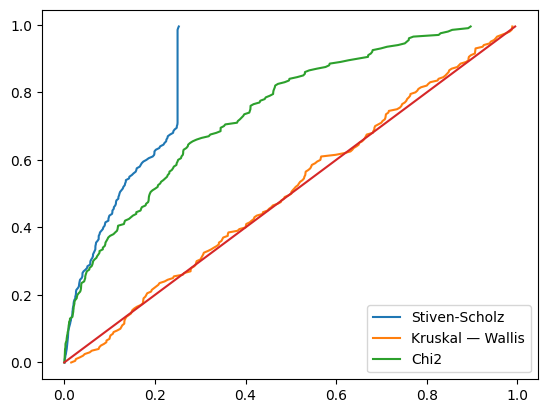

In [ ]:
n, k, m = 1000, 4, 200
data = np.zeros( (m, k, n))
for j in range(m):
  for i in range(k):
    data[j][i] = ss.t.rvs(loc = 0, scale = 1, df = 3+i, size = n)
task(data, k, n, m)

In [ ]:
pip show scipy

Name: scipy
Version: 1.13.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions
        are met:
        
        1. Redistributions of source code must retain the above copyright
           notice, this list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above
           copyright notice, this list of conditions and the following
           disclaimer in the documentation and/or other materials provided
           with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products derived

In [ ]:

pip show scipy
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [ ]:
pip show scipy

Name: scipy
Version: 1.13.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions
        are met:
        
        1. Redistributions of source code must retain the above copyright
           notice, this list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above
           copyright notice, this list of conditions and the following
           disclaimer in the documentation and/or other materials provided
           with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products derived

In [ ]:
rng = np.random.default_rng()
method = ss.PermutationMethod(n_resamples=9999, random_state=rng)
res = ss.anderson_ksamp(data[j][i], method=method)

TypeError: anderson_ksamp() got an unexpected keyword argument 'method'